Xây dựng cây quyết định và rừng cây trên dữ liệu Titanic lấy từ https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset 

In [1]:
!pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


### 1. Nạp thư viện

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

### 2. Xử lý dữ liệu

In [3]:
train_df = pd.read_csv("train.csv")  
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
features = ['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
target = 'Survived'
X_train = train_df[features]
y_train = train_df[target]

### 3. Xây dựng mô hình

In [4]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_pred))

Accuracy: 0.8271604938271605


### 4. Vẽ cây quyết định

✅ Đã lưu hình cây quyết định: decision_tree_titanic.png


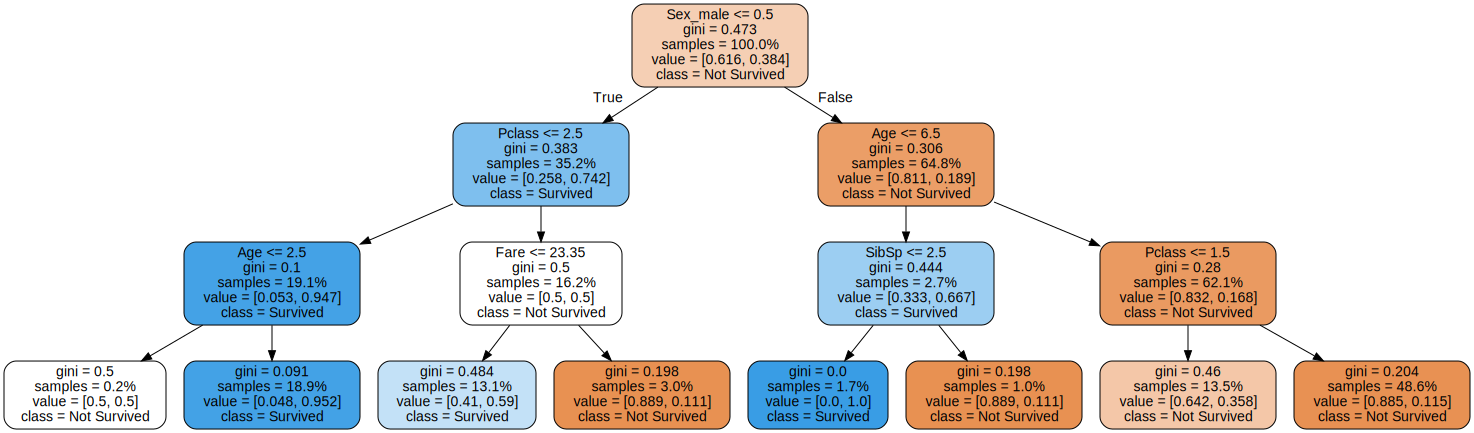

In [5]:
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['Not Survived','Survived'],
                           filled=True, rounded=True,
                           proportion=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_titanic", format="png", cleanup=True)
print("✅ Đã lưu hình cây quyết định: decision_tree_titanic.png")
graph